In [2]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as pyplot
import numpy as np
import scipy.stats 

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['figure.dpi'] = 120

## Shear map from a movable Single Isothermal Sphere.

In [3]:
xvalues = np.arange(0, 200., 5)
yvalues = np.arange(0, 200., 5)
xx, yy = np.meshgrid(xvalues, yvalues)

# Location of sphere
center = (175.00001, 175.00001)

Calculate the shear field from a singlular isothermal sphere with lensing potential

$$ \Psi = c\sqrt{x^2 + y^2} $$

with 

$$ \kappa = \frac{c}{2R} , \qquad \gamma_1 = c \frac{(y^2 - x^2)}{2R^3}, \qquad \gamma_2 = -\frac{cxy}{R^3} $$

where $ R = \sqrt{x^2 + y^2}$

In [4]:
c = .01

x = xx - center[0]
y = yy - center[1]

R = np.sqrt(x**2 + y**2)
kappa = c/(2*R)
gamma1 = c*(y**2 - x**2)/(2*R**3)
gamma2 = -c*(x*y)/R**3

g1 = gamma1/(1 - kappa)
g2 = gamma2/(1 - kappa)

# kill singularity at center of sphere for plotting
max_x, max_y = np.unravel_index(np.argmax(g2), g2.shape)
g2[max_x, max_y] = 0

# Calculate reduced shear
reduced_shear = g1 + g2*1j
magnitude = np.abs(reduced_shear)
phi = np.angle(reduced_shear)/2

## Explore the distribution of g1 and g2

In [5]:
# Make profile histogram

binned_stats = scipy.stats.binned_statistic(g1.flatten(), [g2.flatten(), g2.flatten()**2], bins=50, range=(-.0003, .0003), statistic='mean')

bin_edges = binned_stats.bin_edges
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

mean, mean2 = binned_stats.statistic
std_dev = np.sqrt(mean2 - mean**2)

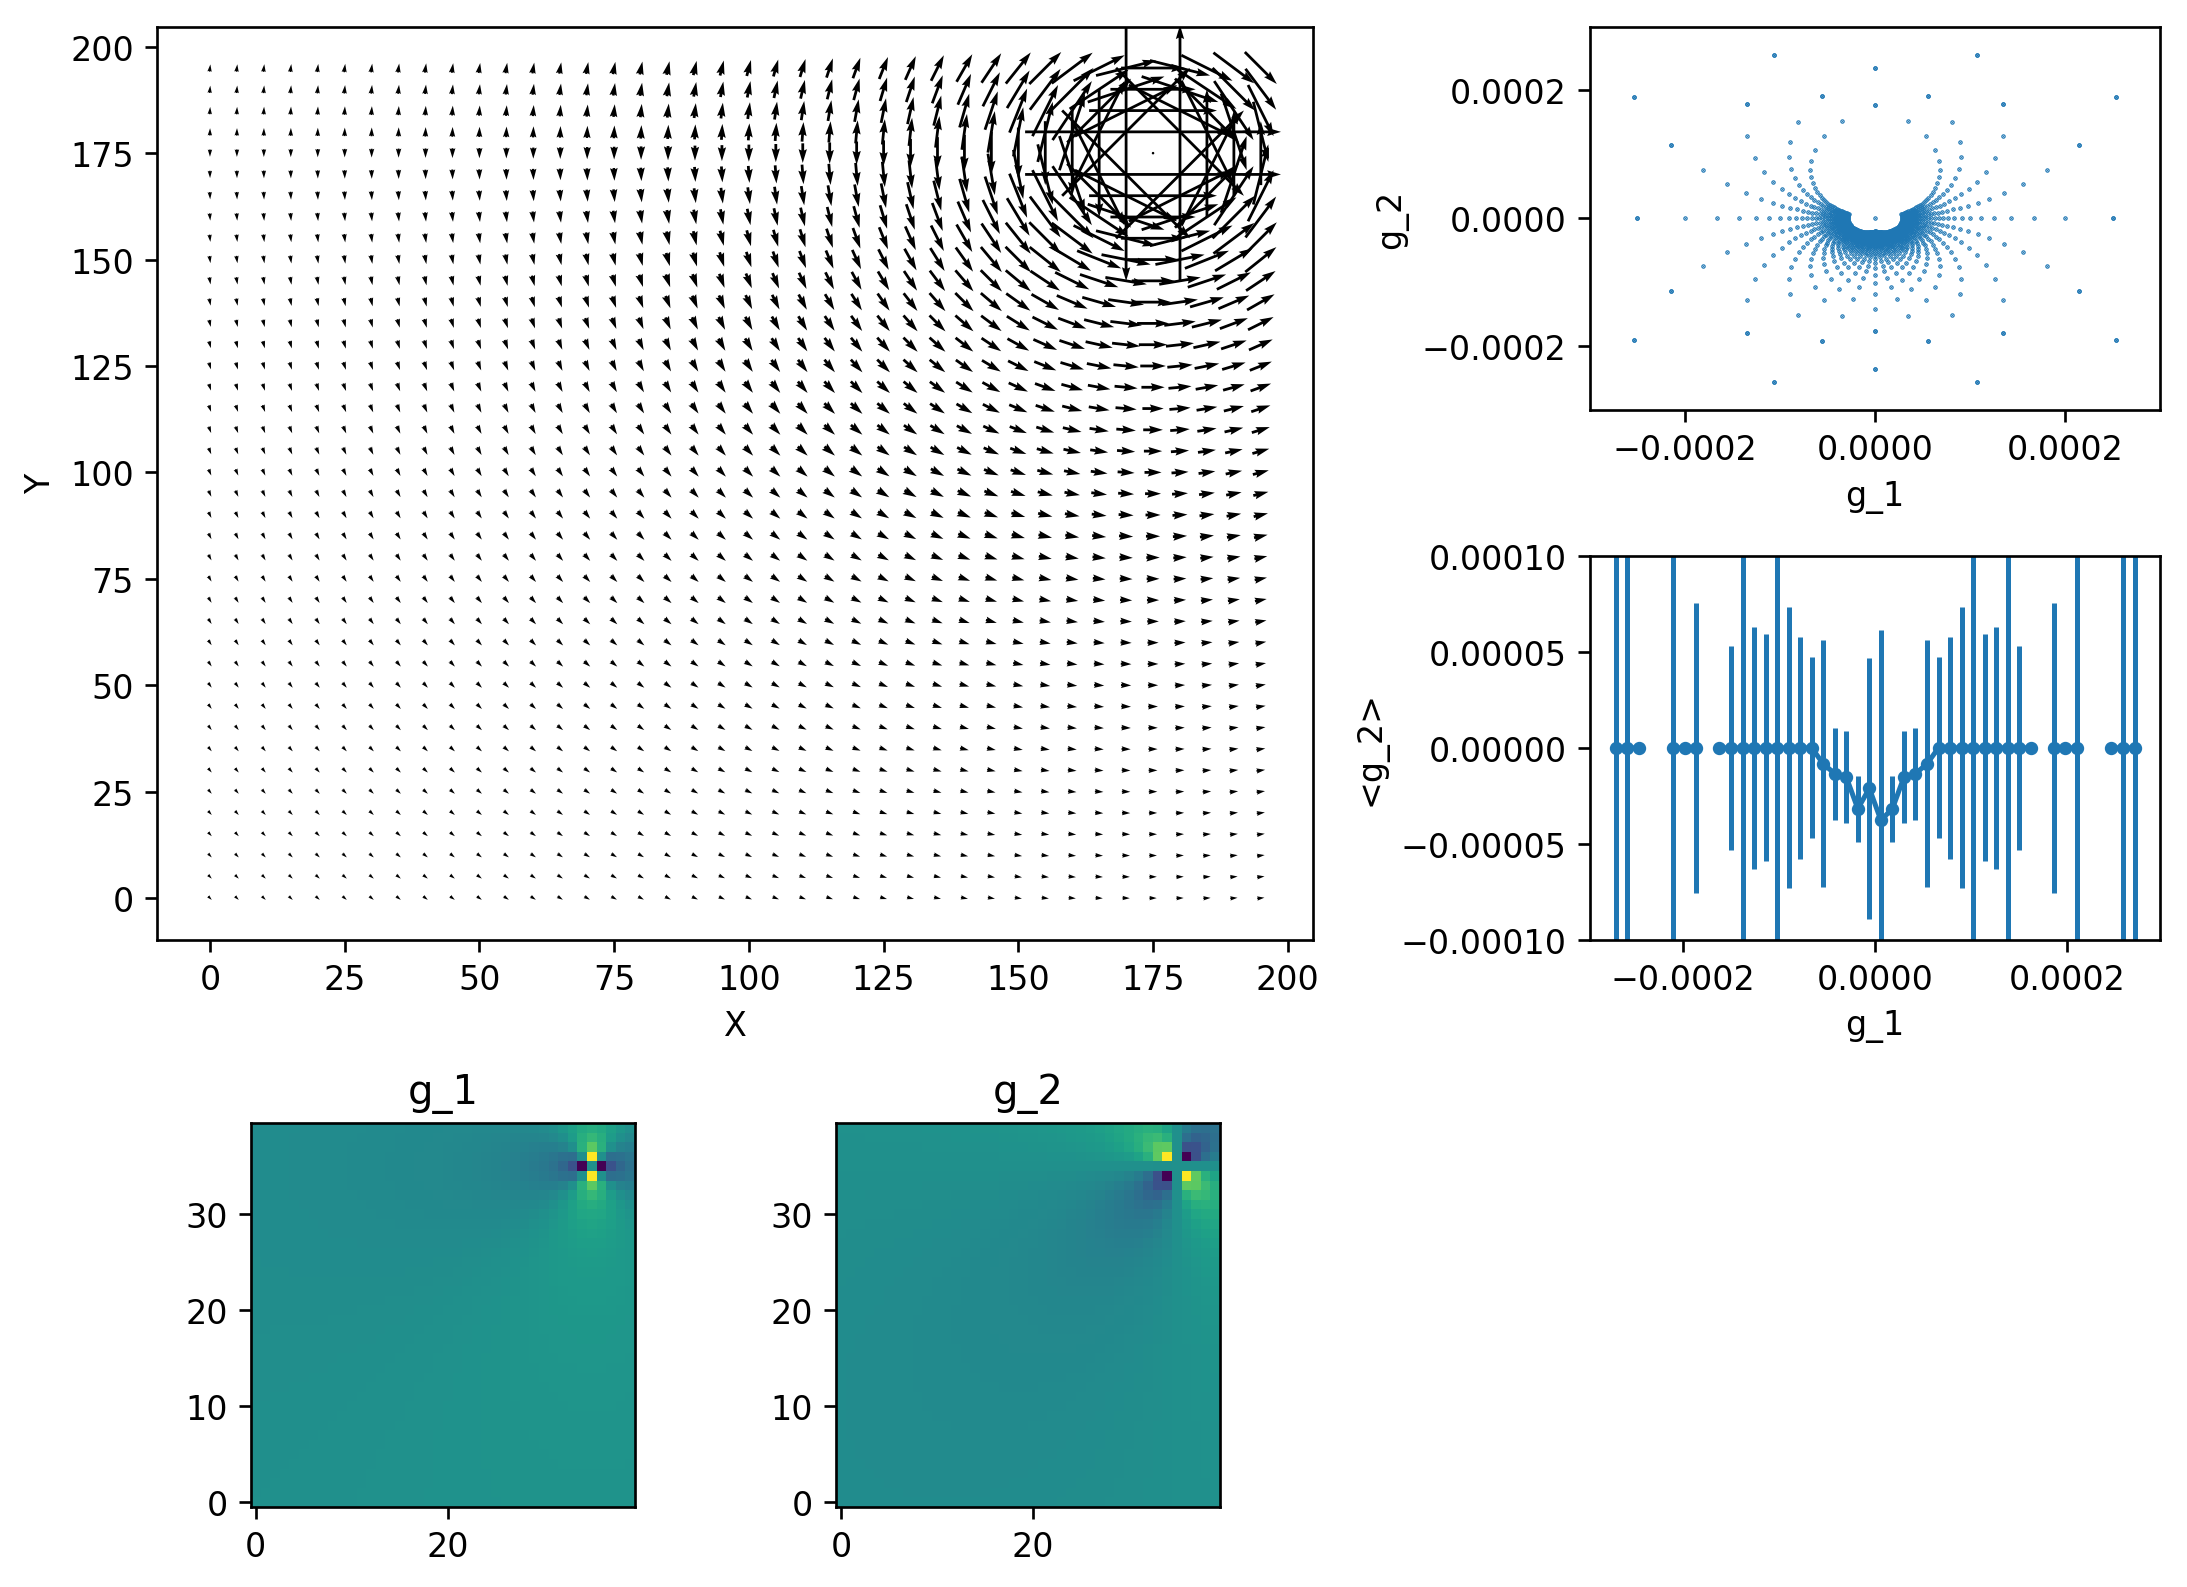

In [7]:
# Make the plots

# Canvas Setup
fig = pyplot.figure(figsize=(9, 6.5), constrained_layout=True)
gs = fig.add_gridspec(3, 3)
ax0 = fig.add_subplot(gs[0:2, 0:2])
ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[1,2])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[2,1])

# Plots
ax0.quiver(xx, yy, magnitude*np.cos(phi), magnitude*np.sin(phi), pivot='mid')#,  headlength=0, headaxislength=0)
ax0.set_xlabel('X')
ax0.set_ylabel('Y')

ax1.scatter(g1, g2, marker='.', s=.5)
ax1.set_xlabel('g_1')
ax1.set_ylabel('g_2')
ax1.set_xlim(-.0003, .0003)
ax1.set_ylim(-.0003, .0003)

ax2.errorbar(x=bin_centers, y=mean, yerr=std_dev, marker='.')
ax2.set_xlabel('g_1')
ax2.set_ylabel('<g_2>')
ax2.set_ylim(-.0001, .0001)

ax3.imshow(g1, origin='lower')
ax4.imshow(g2, origin='lower')
ax3.set_title('g_1');
ax4.set_title('g_2');
#pyplot.colorbar(g1_plot, ax=f3_ax4, shrink=0.9)
#pyplot.colorbar(g2_plot, ax=f3_ax5, shrink=0.9)